In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from io import StringIO
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('XU100.IS.csv')

In [ ]:
df = df.dropna()

df.loc[:5982, 'Open'] = df.loc[:5982, 'Open'] / 100
df.loc[:5982, 'High'] = df.loc[:5982, 'High'] / 100
df.loc[:5982, 'Low'] = df.loc[:5982, 'Low'] / 100
df.loc[:5982, 'Close'] = df.loc[:5982, 'Close'] / 100
df.loc[:5982, 'Adj Close'] = df.loc[:5982, 'Adj Close'] / 100

df = df.loc[df['Date'] < '2020-12-31']

In [ ]:
df = df.loc['2017-12-31'< df['Date'] ]
df.info()
df = df.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748 entries, 5322 to 6092
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       748 non-null    object 
 1   Open       748 non-null    float64
 2   High       748 non-null    float64
 3   Low        748 non-null    float64
 4   Close      748 non-null    float64
 5   Adj Close  748 non-null    float64
 6   Volume     748 non-null    float64
dtypes: float64(6), object(1)
memory usage: 46.8+ KB


In [ ]:
df = df.drop('index', axis=1)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

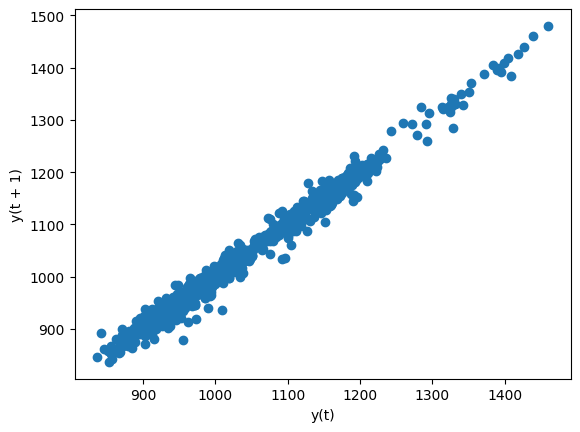

In [ ]:
pd.plotting.lag_plot(df['Close'])

In [ ]:
feature = df['Close'].values.reshape(-1, 1)
isolation_forest = IsolationForest(random_state = 42, contamination = float(0.05))

isolation_forest.fit(feature)

IsolationForest(contamination=0.05, random_state=42)

# Yeni Bölüm

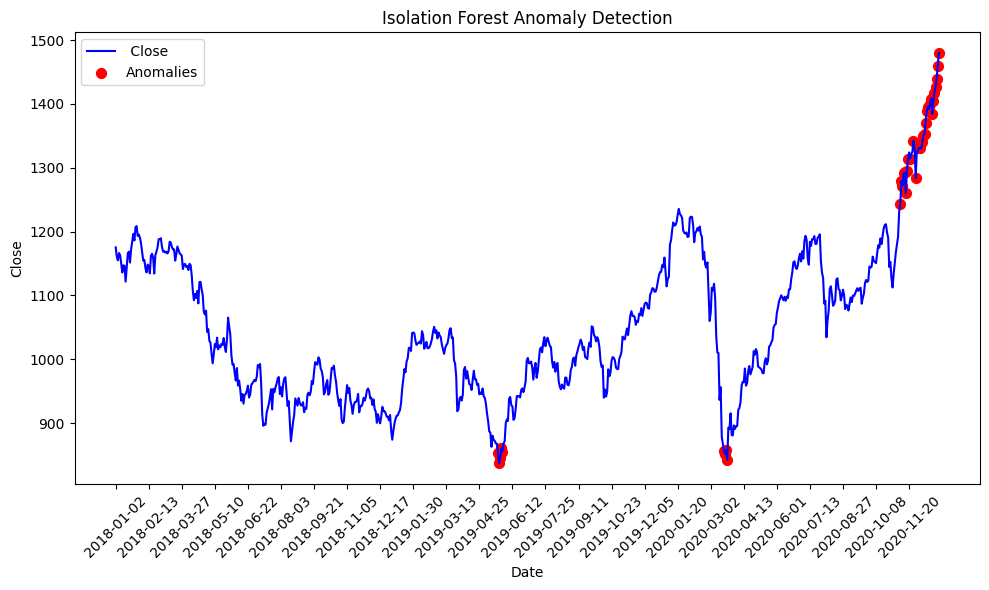

<Figure size 640x480 with 0 Axes>

In [ ]:
df['anomaly_score'] = isolation_forest.decision_function(feature)
df['anomaly_prediction'] = isolation_forest.predict(feature)
feature_column = df['Close']
date_interval =  30

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label=f' Close', color='blue')
plt.scatter(df['Date'][df['anomaly_prediction'] == -1], df['Close'][df['anomaly_prediction'] == -1], label='Anomalies', color='red', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Date')
plt.ylabel(f'Close')
plt.xticks(df.index[::date_interval], df['Date'].iloc[::date_interval], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('outlier_detection_plot.png')


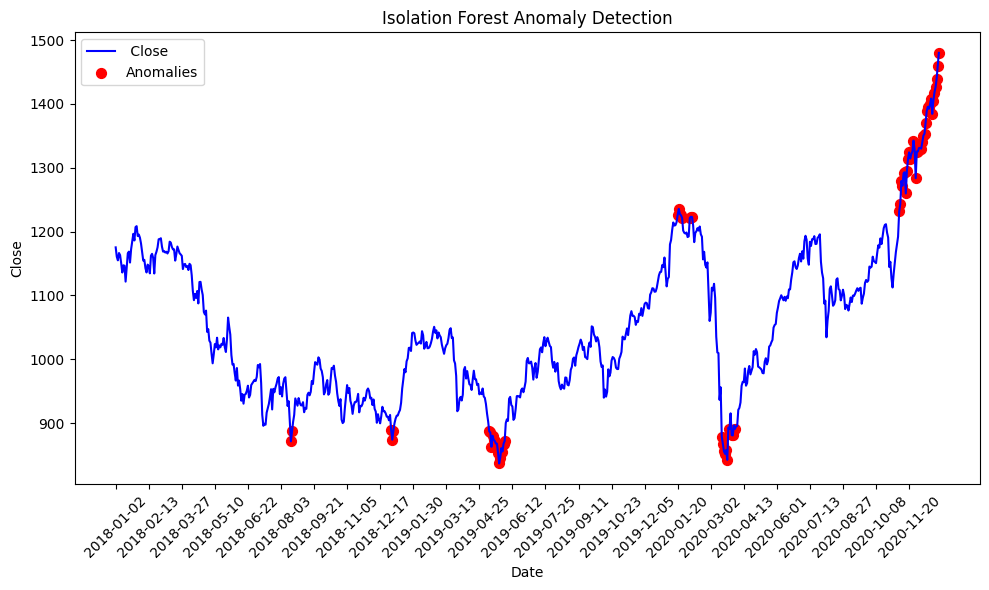

<Figure size 640x480 with 0 Axes>

In [ ]:
feature = df['Close'].values.reshape(-1, 1)
isolation_forest = IsolationForest(random_state = 42, contamination = float(0.1))
isolation_forest.fit(feature)

df['anomaly_score'] = isolation_forest.decision_function(feature)
df['anomaly_prediction'] = isolation_forest.predict(feature)
feature_column = df['Close']
date_interval =  30

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label=f' Close', color='blue')
plt.scatter(df['Date'][df['anomaly_prediction'] == -1], df['Close'][df['anomaly_prediction'] == -1], label='Anomalies', color='red', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Date')
plt.ylabel(f'Close')
plt.xticks(df.index[::date_interval], df['Date'].iloc[::date_interval], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('outlier_detection_plot.png')


In [ ]:
df['score'] = isolation_forest.decision_function(df[['Close']])
df['anomaly_value'] = isolation_forest.predict(df[['Close']])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,anomaly_score,anomaly_prediction,score,anomaly_value
0,2018-01-02,1157.345000,1177.242031,1156.261016,1175.242031,1175.242031,1.539328e+09,0.083363,1,0.083363,1
1,2018-01-03,1177.390000,1183.951016,1157.802031,1160.522031,1160.522031,1.735408e+09,0.093348,1,0.093348,1
2,2018-01-04,1160.686016,1172.588984,1151.522969,1154.912031,1154.912031,1.402445e+09,0.098755,1,0.098755,1
3,2018-01-05,1161.591016,1171.845000,1159.507031,1166.378984,1166.378984,1.087533e+09,0.102847,1,0.102847,1
4,2018-01-08,1175.142969,1177.837031,1162.286016,1163.045000,1163.045000,1.054409e+09,0.094404,1,0.094404,1


 1    673
-1     75
Name: anomaly_value, dtype: int64


<Axes: >

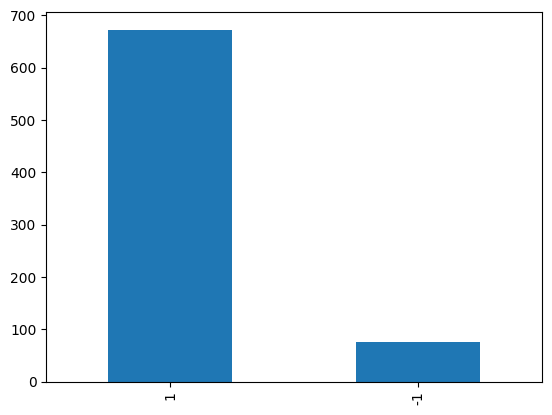

In [ ]:
df['score'] = isolation_forest.decision_function(df[['Close']])
df['anomaly_value'] = isolation_forest.predict(df[['Close']])

outliers = df.loc[df['anomaly_value'] == -1]
outlier_index = list(outliers.index)

print(df['anomaly_value'].value_counts())
df['anomaly_value'].value_counts().plot(kind = 'bar')